# Classification Task

In [1]:
import os
import pickle
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

import plotly.graph_objects as go

#### Ad Freq Plot

In [7]:
with open('../error_analysis/declutr_text_train_class_freq.pkl', 'rb') as handle:
    text_class_freq = pickle.load(handle)
    
with open('../error_analysis/declutr_classification_text_test_act_labels.pkl', 'rb') as handle:
    text_act_labels = pickle.load(handle)
    
with open('../error_analysis/declutr_classification_text_test_pred_labels.pkl', 'rb') as handle:
    text_pred_labels = pickle.load(handle)

with open('../error_analysis/vit_text_train_class_freq.pkl', 'rb') as handle:
    vision_class_freq = pickle.load(handle)
    
with open('../error_analysis/vit_classification_text_test_act_labels.pkl', 'rb') as handle:
    vision_act_labels = pickle.load(handle)
    
with open('../error_analysis/vit_classification_text_test_pred_labels.pkl', 'rb') as handle:
    vision_pred_labels = pickle.load(handle)
    
with open('../error_analysis/multimodal_train_class_freq.pkl', 'rb') as handle:
    multimodal_class_freq = pickle.load(handle)
    
with open('../error_analysis/multimodal_classification_test_act_labels.pkl', 'rb') as handle:
    multimodal_act_labels = pickle.load(handle)
    
with open('../error_analysis/multimodal_classification_test_pred_labels.pkl', 'rb') as handle:
    multimodal_pred_labels = pickle.load(handle)

# Finding TP

In [8]:
with open('../error_analysis/vit_face_train_class_freq.pkl', 'rb') as handle:
    vision_face_class_freq = pickle.load(handle)
    
with open('../error_analysis/vit_faceclassification_text_test_act_labels.pkl', 'rb') as handle:
    vision_face_act_labels = pickle.load(handle)
    
with open('../error_analysis/vit_faceclassification_text_test_pred_labels.pkl', 'rb') as handle:
    vision_face_pred_labels = pickle.load(handle)
    
with open('../error_analysis/multimodal_face_train_class_freq.pkl', 'rb') as handle:
    multimodal_face_class_freq = pickle.load(handle)
    
with open('../error_analysis/mulitmodal_faceclassification_text_test_act_labels.pkl', 'rb') as handle:
    multimodal_face_act_labels = pickle.load(handle)
    
with open('../error_analysis/multimodal_faceclassification_text_test_pred_labels.pkl', 'rb') as handle:
    multimodal_face_pred_labels = pickle.load(handle)

In [9]:
with open('../error_analysis/vit_noface_train_class_freq.pkl', 'rb') as handle:
    vision_noface_class_freq = pickle.load(handle)
    
with open('../error_analysis/vit_nofaceclassification_text_test_act_labels.pkl', 'rb') as handle:
    vision_noface_act_labels = pickle.load(handle)
    
with open('../error_analysis/vit_nofaceclassification_text_test_pred_labels.pkl', 'rb') as handle:
    vision_noface_pred_labels = pickle.load(handle)
    
with open('../error_analysis/multimodal_noface_train_class_freq.pkl', 'rb') as handle:
    multimodal_noface_class_freq = pickle.load(handle)
    
with open('../error_analysis/mulitmodal_nofaceclassification_text_test_act_labels.pkl', 'rb') as handle:
    multimodal_noface_act_labels = pickle.load(handle)
    
with open('../error_analysis/multimodal_nofaceclassification_text_test_pred_labels.pkl', 'rb') as handle:
    multimodal_noface_pred_labels = pickle.load(handle)

In [10]:
text_class_freq = dict(Counter((text_class_freq)))
vision_class_freq = dict(Counter((vision_class_freq)))
multimodal_class_freq = dict(Counter((multimodal_class_freq)))

In [6]:

def calculate_f1_performance(freq_dict, true_labels, pred_labels):
    """
    Calculate F1 performance for each vendor and F1 performance with respect to class frequency.

    Args:
        freq_dict (dict): Dictionary with class frequencies {class_label: frequency}.
        true_labels (list): List of true labels in the test dataset.
        pred_labels (list): List of predicted labels in the test dataset.

    Returns:
        dict, dict: Two dictionaries:
            1. F1 performance for each vendor {class_label: F1_score}.
            2. F1 performance with respect to class frequency {class_freq: mean_F1_score}.
    """
    # Initialize dictionaries to store results
    vendor_f1 = {}
    freq_f1 = defaultdict(list)

    # Unique classes in the dataset
    unique_classes = set(true_labels)

    # Calculate F1 for each vendor
    for vendor in unique_classes:
        # Get binary labels for current vendor
        true_binary = [1 if label == vendor else 0 for label in true_labels]
        pred_binary = [1 if label == vendor else 0 for label in pred_labels]

        # Calculate F1 score
        f1 = f1_score(true_binary, pred_binary, zero_division=0)
        vendor_f1[vendor] = float(round(f1, 4))

        # Associate F1 score with the frequency of the vendor's class
        class_freq = freq_dict.get(vendor, 0)
        freq_f1[class_freq].append(f1)

    # Calculate mean F1 for each frequency
    freq_f1_mean = {freq: round(float(np.mean(f1_scores)), 4) for freq, f1_scores in freq_f1.items()}
    
    vendor_f1 = dict(sorted(vendor_f1.items()))
    freq_f1_mean = dict(sorted(freq_f1_mean.items()))

    return vendor_f1, freq_f1_mean

In [7]:
text_performance, text_class_freq_performance = calculate_f1_performance(text_class_freq, text_act_labels, text_pred_labels)
vision_performance, vision_class_freq_performance = calculate_f1_performance(vision_class_freq, vision_act_labels, vision_pred_labels)
multimodal_performance, multimodal_class_freq_performance = calculate_f1_performance(multimodal_class_freq, multimodal_act_labels, multimodal_pred_labels)

facevision_performance, facevision_class_freq_performance = calculate_f1_performance(vision_face_class_freq, vision_face_act_labels, vision_face_pred_labels)
facemultimodal_performance, facemultimodal_class_freq_performance = calculate_f1_performance(multimodal_face_class_freq, multimodal_face_act_labels, multimodal_face_pred_labels)

In [8]:
nofacevision_performance, nofacevision_class_freq_performance = calculate_f1_performance(vision_noface_class_freq, vision_noface_act_labels, vision_noface_pred_labels)
nofacemultimodal_performance, nofacemultimodal_class_freq_performance = calculate_f1_performance(multimodal_noface_class_freq, multimodal_noface_act_labels, multimodal_noface_pred_labels)

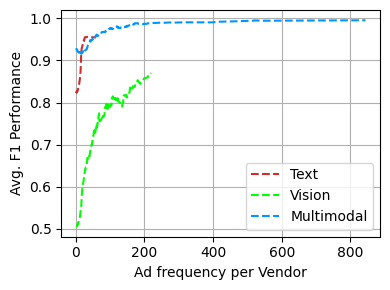

In [9]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Prepare data for plotting
x1, y1 = zip(*sorted(text_class_freq_performance.items()))
x2, y2 = zip(*sorted(vision_class_freq_performance.items()))
x3, y3 = zip(*sorted(multimodal_class_freq_performance.items()))

# Smooth the data
window_size = 30  # Adjust this for more or less smoothing
y1 = uniform_filter1d(y1, size=window_size)
y2 = uniform_filter1d(y2, size=window_size)
y3 = uniform_filter1d(y3, size=window_size)

# Filter x2 and y2 for specific x-axis range
x2 = [x for x in x2 if x <= 220]
y2 = y2[:len(x2)]  # Adjust y2 to match filtered x2

# Plot the data
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label="Text", marker='', linestyle='--', color='#D22B2B')
plt.plot(x2, y2, label="Vision", marker='', linestyle='--', color='#00FF00')
plt.plot(x3, y3, label="Multimodal", marker='', linestyle='--', color='#0096FF')

# Add labels, title, and legend
plt.xlabel("Ad frequency per Vendor")
plt.ylabel("Avg. F1 Performance")
# plt.title("Vendor Frequency vs. F1 Performance")
plt.grid(True)
plt.legend(loc="best")

# Show the plot
plt.tight_layout()
plt.savefig('ad_freq_f1.jpg')
plt.show()

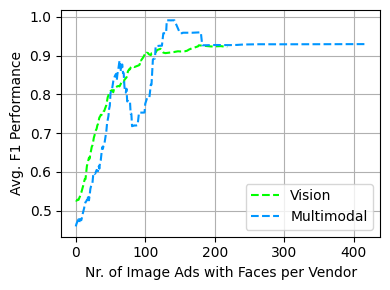

In [10]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Prepare data for plotting
x1, y1 = zip(*sorted(facevision_class_freq_performance.items()))
x2, y2 = zip(*sorted(facemultimodal_class_freq_performance.items()))

# Smooth the data
window_size = 30  # Adjust this for more or less smoothing
y1 = uniform_filter1d(y1, size=window_size)
y2 = uniform_filter1d(y2, size=window_size)

# Filter x2 and y2 for specific x-axis range
x1 = [x for x in x1 if x <= 220]
y1 = y1[:len(x1)]  # Adjust y2 to match filtered x2

# Plot the data
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label="Vision", marker='', linestyle='--', color='#00FF00')
plt.plot(x2, y2, label="Multimodal", marker='', linestyle='--', color='#0096FF')

# Add labels, title, and legend
plt.xlabel("Nr. of Image Ads with Faces per Vendor")
plt.ylabel("Avg. F1 Performance")
# plt.title("Vendor Face Frequency vs. F1 Performance")
plt.grid(True)
plt.legend(loc="best")

# Show the plot
plt.tight_layout()
plt.savefig('ad_imagefaces_f1.jpg')
plt.show()

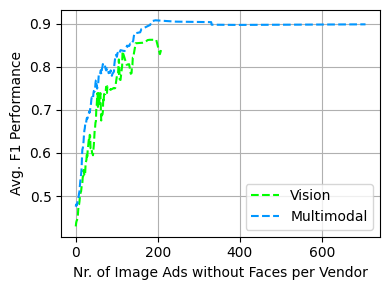

In [11]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Prepare data for plotting
x1, y1 = zip(*sorted(nofacevision_class_freq_performance.items()))
x2, y2 = zip(*sorted(nofacemultimodal_class_freq_performance.items()))

# Smooth the data
window_size = 30  # Adjust this for more or less smoothing
y1 = uniform_filter1d(y1, size=window_size)
y2 = uniform_filter1d(y2, size=window_size)

# Filter x2 and y2 for specific x-axis range
x2 = [x for x in x2 if x <= 220]
y2 = y2[:len(x2)]  # Adjust y2 to match filtered x2

# Plot the data
plt.figure(figsize=(4, 3))
plt.plot(x2, y2, label="Vision", marker='', linestyle='--', color='#00FF00')
plt.plot(x1, y1, label="Multimodal", marker='', linestyle='--', color='#0096FF')

# Add labels, title, and legend
plt.xlabel("Nr. of Image Ads without Faces per Vendor")
plt.ylabel("Avg. F1 Performance")
# plt.title("Vendor Face Frequency vs. F1 Performance")
plt.grid(True)
plt.legend(loc="best")

# Show the plot
plt.tight_layout()
plt.savefig('ad_imagenofaces_f1.jpg')
plt.show()

#### Number of names for text and image classifier

In [12]:
df = pd.read_csv("../data/processed/south_names.csv")

In [13]:
# Removing vendors that have less than 2 ads
vendors_of_interest = {k:v for k, v in dict(Counter(df.VENDOR)).items() if v>1}
df = df[df['VENDOR'].isin(list(vendors_of_interest.keys()))]

# Remapping new vendor ids
all_vendors = df.VENDOR.unique()
vendor_to_idx_dict = {vendor: idx for idx, vendor in enumerate(all_vendors)}
df["VENDOR"] = df["VENDOR"].replace(vendor_to_idx_dict)

num_classes = df.VENDOR.nunique()
assert df['VENDOR'].min() >= 0 and df['VENDOR'].max() < num_classes

In [14]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=1111, stratify=df['VENDOR'])

In [15]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=1111, stratify=df['VENDOR'])

name_dict = {}
for vendor in train_df.VENDOR.unique():
    if int(vendor) not in name_dict.keys():
        df_temp = train_df[train_df.VENDOR == vendor]
        name_dict[int(vendor)] = len(set(df_temp['names'].to_list()))    

In [16]:
def compute_names_mean_performance(name_dict, performance_dict):
    """
    Compute the mean performance (F1 score) for each unique number of names across classes.

    Args:
        name_dict (dict): Dictionary with class labels as keys and number of names as values.
        performance_dict (dict): Dictionary with class labels as keys and F1 scores as values.

    Returns:
        dict: A dictionary where keys are the number of names and values are the mean F1 scores.
    """
    # Create a dictionary to collect F1 scores for each unique number of names
    grouped_performance = defaultdict(list)

    for class_label, f1_score in performance_dict.items():
        if class_label in name_dict.keys():
            num_names = name_dict[class_label]
            grouped_performance[num_names].append(f1_score)

    # Compute mean F1 score for each number of names
    mean_performance = {num_names: float(np.mean(f1_scores)) for num_names, f1_scores in grouped_performance.items()}

    return mean_performance

In [17]:
text_name_mean_performance = compute_names_mean_performance(name_dict, text_performance)
vision_name_mean_performance = compute_names_mean_performance(name_dict, vision_performance)

#### Multimodal baseline

In [18]:
from sklearn.preprocessing import LabelEncoder

# %% Load your DataFrame
df = pd.read_csv("../data/processed/south_names.csv")

# Encode the labels
label_encoder = LabelEncoder()
df['VENDOR'] = label_encoder.fit_transform(df['VENDOR'])

# Identify and keep vendors with at least 2 instances
class_counts = df['VENDOR'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df_filtered = df[df['VENDOR'].isin(valid_classes)]

# Re-encode labels after filtering
df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])
df_filtered = df_filtered[["TEXT", "IMAGES", "VENDOR", "names"]].drop_duplicates()

# Split the data into train, validation, and test sets without mapping images to text yet
train_df, test_df = train_test_split(
    df_filtered, test_size=0.2, random_state=1111, stratify=df_filtered['VENDOR'], shuffle=True
)

In [19]:
name_dict = {}
for vendor in train_df.VENDOR.unique():
    if int(vendor) not in name_dict.keys():
        df_temp = train_df[train_df.VENDOR == vendor]
        name_dict[int(vendor)] = len(set(df_temp['names'].to_list()))    

In [20]:
multimodal_name_mean_performance = compute_names_mean_performance(name_dict, multimodal_performance)

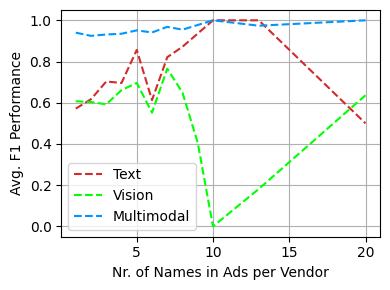

In [21]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Prepare data for plotting
x1, y1 = zip(*sorted(text_name_mean_performance.items()))
x2, y2 = zip(*sorted(vision_name_mean_performance.items()))
x3, y3 = zip(*sorted(multimodal_name_mean_performance.items()))

# Smooth the data
window_size = 1  # Adjust this for more or less smoothing
y1 = uniform_filter1d(y1, size=window_size)
y2 = uniform_filter1d(y2, size=window_size)
y3 = uniform_filter1d(y3, size=window_size)

# Plot the data
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label="Text", marker='', linestyle='--', color='#D22B2B')
plt.plot(x2, y2, label="Vision", marker='', linestyle='--', color='#00FF00')
plt.plot(x3, y3, label="Multimodal", marker='', linestyle='--', color='#0096FF')

# Add labels, title, and legend
plt.xlabel("Nr. of Names in Ads per Vendor")
plt.ylabel("Avg. F1 Performance")
# plt.title("Vendor Frequency vs. F1 Performance")
plt.grid(True)
plt.legend(loc="best")

# Show the plot
plt.tight_layout()
plt.savefig('names_f1.jpg')
plt.show()

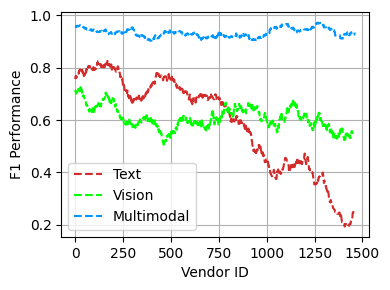

In [22]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Prepare data for plotting
x1, y1 = zip(*sorted(text_performance.items()))
x2, y2 = zip(*sorted(vision_performance.items()))
x3, y3 = zip(*sorted(multimodal_performance.items()))

# Smooth the data
window_size = 100  # Adjust this for more or less smoothing
y1 = uniform_filter1d(y1, size=window_size)
y2 = uniform_filter1d(y2, size=window_size)
y3 = uniform_filter1d(y3, size=window_size)

# Plot the data
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label="Text", marker='', linestyle='--', color='#D22B2B')
plt.plot(x2, y2, label="Vision", marker='', linestyle='--', color='#00FF00')
plt.plot(x3, y3, label="Multimodal", marker='', linestyle='--', color='#0096FF')

# Add labels, title, and legend
plt.xlabel("Vendor ID")
plt.ylabel("F1 Performance")
# plt.title("Vendor Frequency vs. F1 Performance")
plt.grid(True)
plt.legend(loc="best")

# Show the plot
plt.tight_layout()
plt.savefig('vendor_id_performance.jpg')
plt.show()

In [23]:
def calculate_tp_fp_percentage_all_classes(actual_labels, predicted_labels):
    """
    Calculate True Positives (TP) and False Positives (FP) as percentages for all classes in the given lists.

    Args:
        actual_labels (list): List of true labels.
        predicted_labels (list): List of predicted labels.

    Returns:
        tuple: Two dictionaries:
            - tp_dict: {class: TP%}
            - fp_dict: {class: FP%}
    """
    # Get all unique classes from both actual and predicted labels
    all_classes = set(actual_labels).union(set(predicted_labels))

    # Initialize dictionaries for TP% and FP%
    tp_dict = {}
    fp_dict = {}

    for target_class in all_classes:
        tp = 0
        fp = 0
        total_actual = actual_labels.count(target_class)
        total_predicted = predicted_labels.count(target_class)

        for actual, predicted in zip(actual_labels, predicted_labels):
            if predicted == target_class and actual == target_class:  # Correct positive prediction
                tp += 1
            elif predicted == target_class and actual != target_class:  # Incorrect positive prediction
                fp += 1

        tp_percentage = (tp / total_actual) if total_actual > 0 else 0
        fp_percentage = (fp / total_predicted) if total_predicted > 0 else 0

        tp_dict[target_class] = tp_percentage
        fp_dict[target_class] = fp_percentage

    return tp_dict, fp_dict

In [24]:
text_tp_dict, text_fp_dict = calculate_tp_fp_percentage_all_classes(text_act_labels, text_pred_labels)
vision_tp_dict, vision_fp_dict = calculate_tp_fp_percentage_all_classes(vision_act_labels, vision_pred_labels)
multimodal_tp_dict, multimodal_fp_dict = calculate_tp_fp_percentage_all_classes(multimodal_act_labels, multimodal_pred_labels)

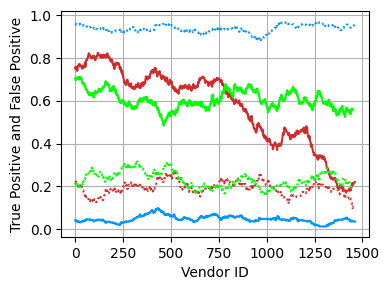

In [25]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Prepare data for plotting
x1, y1 = zip(*sorted(text_tp_dict.items()))
x2, y2 = zip(*sorted(vision_tp_dict.items()))
x3, y3 = zip(*sorted(multimodal_fp_dict.items()))

x4, y4 = zip(*sorted(text_fp_dict.items()))
x5, y5 = zip(*sorted(vision_fp_dict.items()))
x6, y6 = zip(*sorted(multimodal_tp_dict.items()))


# Smooth the data
window_size = 100  # Adjust this for more or less smoothing
y1 = uniform_filter1d(y1, size=window_size)
y2 = uniform_filter1d(y2, size=window_size)
y3 = uniform_filter1d(y3, size=window_size)
y4 = uniform_filter1d(y4, size=window_size)
y5 = uniform_filter1d(y5, size=window_size)
y6 = uniform_filter1d(y6, size=window_size)

# Plot the data
plt.figure(figsize=(4, 3))
plt.plot(x1, y1, label="Text TP", marker='', linestyle='solid', color='#D22B2B')
plt.plot(x4, y4, label="Text FP", marker='', linestyle='dotted', color='#D22B2B')
plt.plot(x2, y2, label="Vision TP", marker='', linestyle='solid', color='#00FF00')
plt.plot(x5, y5, label="Vision FP", marker='', linestyle='dotted', color='#00FF00')
plt.plot(x3, y3, label="Multimodal TP", marker='', linestyle='solid', color='#0096FF')
plt.plot(x6, y6, label="Multimodal FP", marker='', linestyle='dotted', color='#0096FF')

# Add labels, title, and legend
plt.xlabel("Vendor ID")
plt.ylabel("True Positive and False Positive")
# plt.title("Vendor Frequency vs. F1 Performance")
plt.grid(True)
# plt.legend(loc="out")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Adjust bar width and spacing
width = 0.13  # Slimmer bars
gap = 0.01    # Gap between TP and FP groups

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)

# Adjust positions for bars
ind = np.arange(len(categories)) * (0.5 + gap)  # Add gap between TP and FP groups
rects1 = ax.bar(ind - width, text_values, width, color='#F08080', label='Text')
rects2 = ax.bar(ind, vision_values, width, color='#00FF00', label='Vision')
rects3 = ax.bar(ind + width, multimodal_values, width, color='#87CEEB', label='Multimodal')

# Labels and legend
ax.set_ylabel('Avg. Performance')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend(loc='best')

# Annotate bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height, f'{height:.2f}',
                ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

plt.grid(True)
plt.tight_layout()
plt.savefig('tp_fp_performance.jpg')
plt.show()

# Retrieval

#### Text

In [27]:
with open('../error_analysis/declutr_south_mrr.pickle', 'rb') as handle:
    declutr_south_mrr = pickle.load(handle)
    
with open('../error_analysis/declutr_south_rprecision.pickle', 'rb') as handle:
    declutr_south_rprecision = pickle.load(handle)
    
with open('../error_analysis/declutr_south_macro.pickle', 'rb') as handle:
    declutr_south_macro = pickle.load(handle)
    
with open('../error_analysis/declutr_northeast_mrr.pickle', 'rb') as handle:
    declutr_northeast_mrr = pickle.load(handle)
    
with open('../error_analysis/declutr_northeast_rprecision.pickle', 'rb') as handle:
    declutr_northeast_rprecision = pickle.load(handle)
    
with open('../error_analysis/declutr_northeast_macro.pickle', 'rb') as handle:
    declutr_northeast_macro = pickle.load(handle)
    
with open('../error_analysis/declutr_west_mrr.pickle', 'rb') as handle:
    declutr_west_mrr = pickle.load(handle)
    
with open('../error_analysis/declutr_west_rprecision.pickle', 'rb') as handle:
    declutr_west_rprecision = pickle.load(handle)
    
with open('../error_analysis/declutr_west_macro.pickle', 'rb') as handle:
    declutr_west_macro = pickle.load(handle)
    
with open('../error_analysis/declutr_midwest_mrr.pickle', 'rb') as handle:
    declutr_midwest_mrr = pickle.load(handle)
    
with open('../error_analysis/declutr_midwest_rprecision.pickle', 'rb') as handle:
    declutr_midwest_rprecision = pickle.load(handle)
    
with open('../error_analysis/declutr_midwest_macro.pickle', 'rb') as handle:
    declutr_midwest_macro = pickle.load(handle)

#### Vision

In [28]:
import json

with open('../error_analysis/vit_south_mrr.json', 'rb') as json_file:
    vit_south_mrr = json.load(json_file)
    
with open('../error_analysis/vit_south_rprecision.json', 'rb') as json_file:
    vit_south_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_south_macro.json', 'rb') as json_file:
    vit_south_macro = json.load(json_file)
    
with open('../error_analysis/vit_northeast_mrr.json', 'rb') as json_file:
    vit_northeast_mrr = json.load(json_file)
    
with open('../error_analysis/vit_northeast_rprecision.json', 'rb') as json_file:
    vit_northeast_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_northeast_macro.json', 'rb') as json_file:
    vit_northeast_macro = json.load(json_file)
    
with open('../error_analysis/vit_west_mrr.json', 'rb') as json_file:
    vit_west_mrr = json.load(json_file)
    
with open('../error_analysis/vit_west_rprecision.json', 'rb') as json_file:
    vit_west_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_west_macro.json', 'rb') as json_file:
    vit_west_macro = json.load(json_file)
    
with open('../error_analysis/vit_midwest_mrr.json', 'rb') as json_file:
    vit_midwest_mrr = json.load(json_file)
    
with open('../error_analysis/vit_midwest_rprecision.json', 'rb') as json_file:
    vit_midwest_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_midwest_macro.json', 'rb') as json_file:
    vit_midwest_macro = json.load(json_file)

In [29]:
with open('../error_analysis/vit_face_south_mrr.json', 'rb') as json_file:
    vit_face_south_mrr = json.load(json_file)
    
with open('../error_analysis/vit_face_south_rprecision.json', 'rb') as json_file:
    vit_face_south_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_face_south_macro.json', 'rb') as json_file:
    vit_face_south_macro = json.load(json_file)
    
with open('../error_analysis/vit_face_northeast_mrr.json', 'rb') as json_file:
    vit_face_northeast_mrr = json.load(json_file)
    
with open('../error_analysis/vit_face_northeast_rprecision.json', 'rb') as json_file:
    vit_face_northeast_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_face_northeast_macro.json', 'rb') as json_file:
    vit_face_northeast_macro = json.load(json_file)
    
with open('../error_analysis/vit_face_west_mrr.json', 'rb') as json_file:
    vit_face_west_mrr = json.load(json_file)
    
with open('../error_analysis/vit_face_west_rprecision.json', 'rb') as json_file:
    vit_face_west_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_face_west_macro.json', 'rb') as json_file:
    vit_face_west_macro = json.load(json_file)
    
with open('../error_analysis/vit_face_midwest_mrr.json', 'rb') as json_file:
    vit_face_midwest_mrr = json.load(json_file)
    
with open('../error_analysis/vit_face_midwest_rprecision.json', 'rb') as json_file:
    vit_face_midwest_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_face_midwest_macro.json', 'rb') as json_file:
    vit_face_midwest_macro = json.load(json_file)

In [30]:
with open('../error_analysis/vit_noface_south_mrr.json', 'rb') as json_file:
    vit_noface_south_mrr = json.load(json_file)
    
with open('../error_analysis/vit_noface_south_rprecision.json', 'rb') as json_file:
    vit_noface_south_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_noface_south_macro.json', 'rb') as json_file:
    vit_noface_south_macro = json.load(json_file)
    
with open('../error_analysis/vit_noface_northeast_mrr.json', 'rb') as json_file:
    vit_noface_northeast_mrr = json.load(json_file)
    
with open('../error_analysis/vit_noface_northeast_rprecision.json', 'rb') as json_file:
    vit_noface_northeast_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_noface_northeast_macro.json', 'rb') as json_file:
    vit_noface_northeast_macro = json.load(json_file)
    
with open('../error_analysis/vit_noface_west_mrr.json', 'rb') as json_file:
    vit_noface_west_mrr = json.load(json_file)
    
with open('../error_analysis/vit_noface_west_rprecision.json', 'rb') as json_file:
    vit_noface_west_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_noface_west_macro.json', 'rb') as json_file:
    vit_noface_west_macro = json.load(json_file)
    
with open('../error_analysis/vit_noface_midwest_mrr.json', 'rb') as json_file:
    vit_noface_midwest_mrr = json.load(json_file)
    
with open('../error_analysis/vit_noface_midwest_rprecision.json', 'rb') as json_file:
    vit_noface_midwest_rprecision = json.load(json_file)
    
with open('../error_analysis/vit_noface_midwest_macro.json', 'rb') as json_file:
    vit_noface_midwest_macro = json.load(json_file)

#### Multimodal

In [3]:
def load_metrics(model_name, cities, modes, base_path='../error_analysis'):
    """
    Load metrics (MRR, R-Precision, Macro-F1) for a given model, cities, and modes from JSON files.
    
    Parameters:
        model_name (str): The name of the model (e.g., 'declutr-vit').
        cities (list): List of cities (e.g., ['south', 'midwest', 'west', 'northeast']).
        modes (list): List of modes (e.g., ['text', 'image', 'multimodal']).
        base_path (str): Base path where JSON files are stored.

    Returns:
        dict: Nested dictionary containing loaded metrics.
    """
    metrics = {}
    
    for city in cities:
        for mode in modes:
            key = f"{model_name}_{city}_{mode}"
            metrics[key] = {}
            
            for metric_type in ["mrr", "rprecision", "macro"]:
                file_path = f"{base_path}/{model_name}_{city}_{mode}_{metric_type}.json"
                try:
                    # Check if file exists and is non-empty
                    with open(file_path, 'r') as json_file:
                        content = json_file.read().strip()
                        if not content:
                            print(f"File is empty: {file_path}")
                            metrics[key][metric_type] = None
                            continue
                        
                        metrics[key][metric_type] = json.loads(content)
                except FileNotFoundError:
                    print(f"File not found: {file_path}")
                    metrics[key][metric_type] = None
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON file: {file_path}, Error: {e}")
                    metrics[key][metric_type] = None

    return metrics

In [4]:
import json

models = ["declutr-vit", "declutr-vit-face", "declutr-vit-noface", "CE-SupCon-mean"]
cities = ["south", "midwest", "west", "northeast"]
modes = ["text", "image", "multimodal"]
model_metrics = {}

# Load metrics for each model
for model in models:
    print(f"Loading metrics for {model}...")
    model_metrics[model] = load_metrics(model_name=model, cities=cities, modes=modes)

Loading metrics for declutr-vit...
Loading metrics for declutr-vit-face...
Loading metrics for declutr-vit-noface...
Loading metrics for CE-SupCon-mean...


In [33]:
# Alterantively

In [ ]:
# Initialize the main dictionary
data = {}

# Define the list of models, cities, metrics, and modalities
models = ['declutr', 'vit', 'vit-face', 'vit-noface', 'declutr-vit', 'declutr-vit-face', 'declutr-vit-noface']
cities = ['south', 'midwest', 'west', 'northeast']
metrics = ['mrr', 'rprecision', 'macro']

# Mapping of modalities for each model
model_modalities = {
    'declutr': ['text'],
    'vit': ['image'],
    'vit-face': ['image'],
    'vit-noface': ['image'],
    'declutr-vit': ['multimodal-text', 'multimodal-vision', 'multimodal'],
    'declutr-vit-face': ['multimodal-text', 'multimodal-vision', 'multimodal'],
    'declutr-vit-noface': ['multimodal-text', 'multimodal-vision', 'multimodal'],
}

# First, process the variables loaded from .pickle and .json files
# For models: declutr, vit, vit-face, vit-noface
# These models have variables loaded directly (e.g., declutr_south_mrr)

# List of variable names for these models
variables = [
    # declutr variables
    'declutr_south_mrr', 'declutr_south_rprecision', 'declutr_south_macro',
    'declutr_northeast_mrr', 'declutr_northeast_rprecision', 'declutr_northeast_macro',
    'declutr_west_mrr', 'declutr_west_rprecision', 'declutr_west_macro',
    'declutr_midwest_mrr', 'declutr_midwest_rprecision', 'declutr_midwest_macro',
    # vit variables
    'vit_south_mrr', 'vit_south_rprecision', 'vit_south_macro',
    'vit_northeast_mrr', 'vit_northeast_rprecision', 'vit_northeast_macro',
    'vit_west_mrr', 'vit_west_rprecision', 'vit_west_macro',
    'vit_midwest_mrr', 'vit_midwest_rprecision', 'vit_midwest_macro',
    # vit-face variables
    'vit_face_south_mrr', 'vit_face_south_rprecision', 'vit_face_south_macro',
    'vit_face_northeast_mrr', 'vit_face_northeast_rprecision', 'vit_face_northeast_macro',
    'vit_face_west_mrr', 'vit_face_west_rprecision', 'vit_face_west_macro',
    'vit_face_midwest_mrr', 'vit_face_midwest_rprecision', 'vit_face_midwest_macro',
    # vit-noface variables
    'vit_noface_south_mrr', 'vit_noface_south_rprecision', 'vit_noface_south_macro',
    'vit_noface_northeast_mrr', 'vit_noface_northeast_rprecision', 'vit_noface_northeast_macro',
    'vit_noface_west_mrr', 'vit_noface_west_rprecision', 'vit_noface_west_macro',
    'vit_noface_midwest_mrr', 'vit_noface_midwest_rprecision', 'vit_noface_midwest_macro',
]

# Process the variables and populate the dictionary
for var_name in variables:
    parts = var_name.split('_')
    if len(parts) == 3:
        model_name, city, metric = parts
    elif len(parts) == 4:
        model_name, face_option, city, metric = parts
        model_name = f"{model_name}_{face_option}"
    else:
        print(f"Unexpected variable name format: {var_name}")
        continue

    # Map model names to consistent naming
    model_mapping = {
        'declutr': 'declutr',
        'vit': 'vit',
        'vit_face': 'vit-face',
        'vit_noface': 'vit-noface',
    }
    model = model_mapping.get(model_name)
    if not model:
        print(f"Unknown model: {model_name}")
        continue

    # Retrieve the value of the variable
    value = locals()[var_name]

    # Initialize nested dictionaries if not present
    data.setdefault(model, {}).setdefault(city, {})
    modality = 'text' if model == 'declutr' else 'image'
    data[model][city].setdefault(modality, {})
    data[model][city][modality][metric] = value

# Next, process the models with multimodal options
# Models: declutr-vit, declutr-vit-face, declutr-vit-noface
# Load metrics using the load_metrics function
def load_metrics(model_name, cities, modes, base_path='../error_analysis'):
    metrics = {}
    for city in cities:
        for mode in modes:
            key = f"{model_name}_{city}_{mode}"
            metrics[key] = {}
            for metric_type in ["mrr", "rprecision", "macro"]:
                file_path = f"{base_path}/{model_name}_{city}_{mode}_{metric_type}.json"
                try:
                    with open(file_path, 'r') as json_file:
                        content = json_file.read().strip()
                        if not content:
                            metrics[key][metric_type] = None
                            continue
                        metrics[key][metric_type] = json.loads(content)
                except FileNotFoundError:
                    metrics[key][metric_type] = None
                except json.JSONDecodeError as e:
                    metrics[key][metric_type] = None
    return metrics

# Models and modes for multimodal models
multimodal_models = ["declutr-vit", "declutr-vit-face", "declutr-vit-noface"]
multimodal_modes = ["text", "image", "multimodal"]
model_metrics = {}

# Load metrics for each multimodal model
for model in multimodal_models:
    model_metrics[model] = load_metrics(model_name=model, cities=cities, modes=multimodal_modes)

# Process the loaded metrics and populate the dictionary
for model in multimodal_models:
    data.setdefault(model, {})
    metrics_dict = model_metrics[model]
    for key, metrics_values in metrics_dict.items():
        # Extract city and mode from the key
        _, city, mode = key.split('_', 2)
        # Map modes to modalities
        modality_mapping = {
            'text': 'multimodal-text',
            'image': 'multimodal-vision',
            'multimodal': 'multimodal',
        }
        modality = modality_mapping.get(mode)
        if not modality:
            continue
        # Initialize nested dictionaries if not present
        data[model].setdefault(city, {}).setdefault(modality, {})
        for metric in ['mrr', 'rprecision', 'macro']:
            value = metrics_values.get(metric)
            data[model][city][modality][metric] = value

# Now, all variables are stored in the 'data' dictionary

KeyError: 'declutr_south_mrr'

In [18]:
model_metrics.keys()

dict_keys(['declutr-vit', 'declutr-vit-face', 'declutr-vit-noface'])

# Generating plots

In [35]:
south_df = pd.read_csv("../data/processed/south_names.csv")[['TEXT', 'VENDOR', 'IMAGES', 'names']].drop_duplicates()
west_df = pd.read_csv("../data/processed/west_names.csv")[['TEXT', 'VENDOR', 'IMAGES', 'names']].drop_duplicates()
northeast_df = pd.read_csv("../data/processed/northeast_names.csv")[['TEXT', 'VENDOR', 'IMAGES', 'names']].drop_duplicates()
midwest_df = pd.read_csv("../data/processed/midwest_names.csv")[['TEXT', 'VENDOR', 'IMAGES', 'names']].drop_duplicates()

In [36]:
def drop_vendors_with_one_ad(df):
    # Encode the labels
    label_encoder = LabelEncoder()
    df['VENDOR'] = label_encoder.fit_transform(df['VENDOR'])

    # Identify and keep vendors with at least 2 instances
    class_counts = df['VENDOR'].value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    df_filtered = df[df['VENDOR'].isin(valid_classes)]

    # Re-encode labels after filtering
    df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])
    return df_filtered

In [37]:
south_df = drop_vendors_with_one_ad(south_df)
west_df = drop_vendors_with_one_ad(west_df)
northeast_df = drop_vendors_with_one_ad(northeast_df)
midwest_df = drop_vendors_with_one_ad(midwest_df)

/tmp/ipykernel_2603489/1055555342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])
/tmp/ipykernel_2603489/1055555342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])


In [38]:
south_freq_dict = dict(Counter((south_df['VENDOR'].to_list())))
west_freq_dict = dict(Counter((west_df['VENDOR'].to_list())))
northeast_freq_dict = dict(Counter((northeast_df['VENDOR'].to_list())))
midwest_freq_dict = dict(Counter((midwest_df['VENDOR'].to_list())))

In [39]:
def get_names_dict(df):
    split_ratio = max(0.20, df.VENDOR.nunique()/len(df))
    train_df, test_df = train_test_split(df, test_size=split_ratio, random_state=1111, stratify=df['VENDOR'])

    name_dict = {}
    for vendor in train_df.VENDOR.unique():
        if int(vendor) not in name_dict.keys():
            df_temp = train_df[train_df.VENDOR == vendor]
            name_dict[int(vendor)] = len(set(df_temp['names'].to_list()))   
    
    return name_dict

In [40]:
south_name_dict = get_names_dict(south_df)
west_name_dict = get_names_dict(west_df)
northeast_name_dict = get_names_dict(northeast_df)
midwest_name_dict = get_names_dict(midwest_df)

In [41]:
south_images_df = pd.read_csv("../data/processed/south_images.csv")
west_images_df = pd.read_csv("../data/processed/west_images.csv")
midwest_images_df = pd.read_csv("../data/processed/midwest_images.csv")
northeast_images_df = pd.read_csv("../data/processed/northeast_images.csv")

In [42]:
def get_nr_of_faces(df, mode="face"):
    # Encode the labels
    df = df[["IMAGE", "VENDOR", "IF_FACE"]].drop_duplicates()
    
    label_encoder = LabelEncoder()
    df['VENDOR'] = label_encoder.fit_transform(df['VENDOR'])

    # Identify and keep vendors with at least 2 instances
    class_counts = df['VENDOR'].value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    df_filtered = df[df['VENDOR'].isin(valid_classes)]

    # Re-encode labels after filtering
    df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])
    
    split_ratio = max(0.20, df_filtered.VENDOR.nunique()/len(df_filtered))
    train_df, test_df = train_test_split(df_filtered, test_size=split_ratio, random_state=1111, stratify=df_filtered['VENDOR'])
    
    if mode == "face":
        new_train_df = train_df[train_df["IF_FACE"] == "yes"]
    else:
        new_train_df = train_df[train_df["IF_FACE"] == "no"]
        
    return dict(Counter(new_train_df['VENDOR']))

In [43]:
south_face_freq = get_nr_of_faces(south_images_df, mode="face")
west_face_freq = get_nr_of_faces(west_images_df, mode="face")
northeast_face_freq = get_nr_of_faces(northeast_images_df, mode="face")
midwest_face_freq = get_nr_of_faces(midwest_images_df, mode="face")

south_noface_freq = get_nr_of_faces(south_images_df, mode="noface")
west_noface_freq = get_nr_of_faces(west_images_df, mode="noface")
northeast_noface_freq = get_nr_of_faces(northeast_images_df, mode="noface")
midwest_noface_freq = get_nr_of_faces(midwest_images_df, mode="noface")

/tmp/ipykernel_2603489/3415305515.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])
/tmp/ipykernel_2603489/3415305515.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VENDOR'] = label_encoder.fit_transform(df_filtered['VENDOR'])
/tmp/ipykernel_2603489/3415305515.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [44]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

def convert_all_dicts_to_nrs(my_dict):
    return {int(k):int(v) for k,v in my_dict.items()}

In [45]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

def plot_metric_by_vendor(data, model_names, modalities, region, metric):
    """
    Plots the specified metric for given models and modalities in the specified region.

    Parameters:
        data (dict): The data dictionary containing all metrics.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city (e.g., 'south', 'midwest', 'west', 'northeast').
        metric (str): The performance metric to plot ('mrr', 'rprecision', or 'macro').

    Returns:
        None
    """
    def convert_all_dicts_to_nrs(my_dict):
        return {int(k): float(v) for k, v in my_dict.items()}
    
    # Ensure clean background
    plt.style.use('default')
    
    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7F7F7F'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']
    
    # Initialize plot
    plt.figure(figsize=(4, 3))
    
    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue
        
        # Convert the dictionary keys and values to integers and floats
        metric_data = convert_all_dicts_to_nrs(metric_data)
        
        # Sort the data
        x, y = zip(*sorted(metric_data.items()))
        
        # Smooth the data
        window_size = max(1, len(y) // 20)
        y_smoothed = uniform_filter1d(y, size=window_size)
        
        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))
        
        # Plot the data
        plt.plot(x, y_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
    
    # Add labels, title, and legend
    plt.xlabel("Vendor ID")
    ylabel_mapping = {'mrr': 'MRR@10 Performance', 'rprecision': 'R-Precision Performance', 'macro': 'Macro-F1 Score'}
    plt.ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    # plt.title(f"{ylabel_mapping.get(metric, metric.capitalize())} in {region.capitalize()}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc="best")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

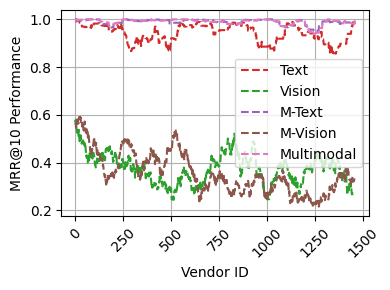

In [46]:
# Define the models, modalities, region, and metric you want to plot
model_names = ['declutr', 'vit', 'declutr-vit', 'declutr-vit', 'declutr-vit']
modalities = ['text', 'image', 'multimodal-text', 'multimodal-vision', 'multimodal']
region = 'south'
metric = 'mrr'  # Can be 'mrr', 'rprecision', or 'macro'

# Call the function to plot the data
plot_metric_by_vendor(data, model_names, modalities, region, metric)

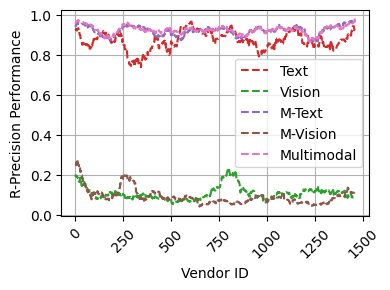

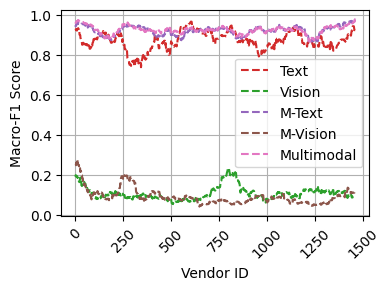

In [47]:
# For R-Precision
metric = 'rprecision'
plot_metric_by_vendor(data, model_names, modalities, region, metric)

# For Macro-F1 Score
metric = 'macro'
plot_metric_by_vendor(data, model_names, modalities, region, metric)


In [48]:
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import uniform_filter1d

def plot_performance_vs_class_frequency(data, class_freq_dict, model_names, modalities, region, metric):
    """
    Plots model performance vs class frequency for specified models, modalities, region, and metric.
    Applies a smoothing window to the performance data.

    Parameters:
        data (dict): The data dictionary containing all metrics.
        class_freq_dict (dict): Dictionary mapping vendor IDs to class frequencies.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city (e.g., 'south', 'midwest', 'west', 'northeast').
        metric (str): The performance metric to plot ('mrr', 'rprecision', or 'macro').

    Returns:
        None
    """
    # Ensure clean background
    plt.style.use('default')
    
    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7F7F7F'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']
    
    # Initialize plot
    plt.figure(figsize=(4, 3))
    
    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue
        
        # Initialize a dictionary to map class frequency to performance metrics
        freq_to_performance = defaultdict(list)
        
        # For each vendor ID in metric_data, get the class frequency and performance
        for vendor_id_str, performance in metric_data.items():
            try:
                vendor_id = int(vendor_id_str)
                class_freq = class_freq_dict.get(vendor_id)
                if class_freq is None:
                    # Vendor ID not in class frequency dict
                    continue
                freq_to_performance[class_freq].append(float(performance))
            except ValueError:
                # Vendor ID is not an integer
                continue
        
        # Compute mean performance for each class frequency
        freqs = []
        mean_performances = []
        for freq, performances in freq_to_performance.items():
            freqs.append(freq)
            mean_performance = sum(performances) / len(performances)
            mean_performances.append(mean_performance)
        
        if not freqs:
            print(f"No matching data found for model {model_name} in region {region}.")
            continue
        
        # Sort the data by class frequency
        freqs, mean_performances = zip(*sorted(zip(freqs, mean_performances)))
        freqs = list(freqs)
        mean_performances = list(mean_performances)
        
        # Smooth the data
        #window_size = max(1, len(mean_performances) // 20)
        window_size = 30
        mean_performances_smoothed = uniform_filter1d(mean_performances, size=window_size)
        
        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))
        
        # Plot the data
        plt.plot(freqs, mean_performances_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
    
    # Add labels, title, and legend
    plt.xlabel("Ad frequency per Vendor")
    ylabel_mapping = {'mrr': 'Mean MRR@10', 'rprecision': 'Mean R-Precision', 'macro': 'Mean Macro-F1 Score'}
    plt.ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    # plt.title(f"{ylabel_mapping.get(metric, metric.capitalize())} vs Class Frequency in {region.capitalize()}")
    plt.grid(True)
    plt.legend(loc="best")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [49]:
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import uniform_filter1d

def plot_performance_vs_name_frequency(data, name_freq_dict, model_names, modalities, region, metric):
    """
    Plots model performance vs class frequency for specified models, modalities, region, and metric.
    Applies a smoothing window to the performance data.

    Parameters:
        data (dict): The data dictionary containing all metrics.
        name_freq_dict (dict): Dictionary mapping vendor IDs to class frequencies.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city (e.g., 'south', 'midwest', 'west', 'northeast').
        metric (str): The performance metric to plot ('mrr', 'rprecision', or 'macro').

    Returns:
        None
    """
    # Ensure clean background
    plt.style.use('default')
    
    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7F7F7F'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']
    
    # Initialize plot
    plt.figure(figsize=(4, 3))
    
    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue
        
        # Initialize a dictionary to map class frequency to performance metrics
        freq_to_performance = defaultdict(list)
        
        # For each vendor ID in metric_data, get the class frequency and performance
        for vendor_id_str, performance in metric_data.items():
            try:
                vendor_id = int(vendor_id_str)
                class_freq = name_freq_dict.get(vendor_id)
                if class_freq is None:
                    # Vendor ID not in class frequency dict
                    continue
                freq_to_performance[class_freq].append(float(performance))
            except ValueError:
                # Vendor ID is not an integer
                continue
        
        # Compute mean performance for each class frequency
        freqs = []
        mean_performances = []
        for freq, performances in freq_to_performance.items():
            freqs.append(freq)
            mean_performance = sum(performances) / len(performances)
            mean_performances.append(mean_performance)
        
        if not freqs:
            print(f"No matching data found for model {model_name} in region {region}.")
            continue
        
        # Sort the data by class frequency
        freqs, mean_performances = zip(*sorted(zip(freqs, mean_performances)))
        freqs = list(freqs)
        mean_performances = list(mean_performances)
        
        # Smooth the data
        # window_size = max(1, len(mean_performances) // 20)
        window_size = 30
        mean_performances_smoothed = uniform_filter1d(mean_performances, size=window_size)
        
        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))
        
        # Plot the data
        plt.plot(freqs, mean_performances_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
    
    # Add labels, title, and legend
    plt.xlabel("Nr. of Names in Ads per Vendor")
    ylabel_mapping = {'mrr': 'Mean MRR@10', 'rprecision': 'Mean R-Precision', 'macro': 'Mean Macro-F1 Score'}
    plt.ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    # plt.title(f"{ylabel_mapping.get(metric, metric.capitalize())} vs Class Frequency in {region.capitalize()}")
    plt.grid(True)
    plt.legend(loc="best")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

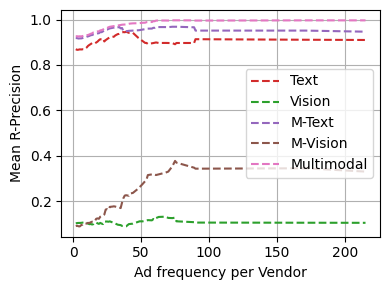

In [50]:
# Define the models and modalities you want to plot
model_names = ['declutr', 'vit', 'declutr-vit', 'declutr-vit', 'declutr-vit']
modalities = ['text', 'image', 'multimodal-text', 'multimodal-vision', 'multimodal']
region = 'south'
metric = 'rprecision'  # Can be 'mrr', 'rprecision', or 'macro'

# Call the function to plot the data
plot_performance_vs_class_frequency(data, south_freq_dict, model_names, modalities, region, metric)

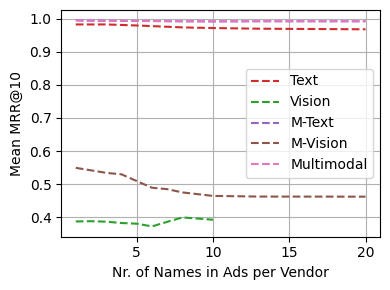

In [51]:
# Define the models and modalities you want to plot
model_names = ['declutr', 'vit', 'declutr-vit', 'declutr-vit', 'declutr-vit']
modalities = ['text', 'image', 'multimodal-text', 'multimodal-vision', 'multimodal']
region = 'south'
metric = 'mrr'  # Can be 'mrr', 'rprecision', or 'macro'

# Call the function to plot the data
plot_performance_vs_name_frequency(data, south_name_dict, model_names, modalities, region, metric)

In [52]:
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import uniform_filter1d

def plot_performance_vs_face_frequency(data, name_freq_dict, model_names, modalities, region, metric):
    """
    Plots model performance vs class frequency for specified models, modalities, region, and metric.
    Applies a smoothing window to the performance data.

    Parameters:
        data (dict): The data dictionary containing all metrics.
        name_freq_dict (dict): Dictionary mapping vendor IDs to class frequencies.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city (e.g., 'south', 'midwest', 'west', 'northeast').
        metric (str): The performance metric to plot ('mrr', 'rprecision', or 'macro').

    Returns:
        None
    """
    # Ensure clean background
    plt.style.use('default')
    
    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7F7F7F'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']
    
    # Initialize plot
    plt.figure(figsize=(4, 3))
    
    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue
        
        # Initialize a dictionary to map class frequency to performance metrics
        freq_to_performance = defaultdict(list)
        
        # For each vendor ID in metric_data, get the class frequency and performance
        for vendor_id_str, performance in metric_data.items():
            try:
                vendor_id = int(vendor_id_str)
                class_freq = name_freq_dict.get(vendor_id)
                if class_freq is None:
                    # Vendor ID not in class frequency dict
                    continue
                freq_to_performance[class_freq].append(float(performance))
            except ValueError:
                # Vendor ID is not an integer
                continue
        
        # Compute mean performance for each class frequency
        freqs = []
        mean_performances = []
        for freq, performances in freq_to_performance.items():
            freqs.append(freq)
            mean_performance = sum(performances) / len(performances)
            mean_performances.append(mean_performance)
        
        if not freqs:
            print(f"No matching data found for model {model_name} in region {region}.")
            continue
        
        # Sort the data by class frequency
        freqs, mean_performances = zip(*sorted(zip(freqs, mean_performances)))
        freqs = list(freqs)
        mean_performances = list(mean_performances)
        
        # Smooth the data
        # window_size = max(1, len(mean_performances) // 20)
        window_size = 30
        mean_performances_smoothed = uniform_filter1d(mean_performances, size=window_size)
        
        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))
        
        # Plot the data
        plt.plot(freqs, mean_performances_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
    
    # Add labels, title, and legend
    plt.xlabel("Nr. of Image Ads with Faces per Vendor")
    ylabel_mapping = {'mrr': 'Mean MRR@10', 'rprecision': 'Mean R-Precision', 'macro': 'Mean Macro-F1 Score'}
    plt.ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    # plt.title(f"{ylabel_mapping.get(metric, metric.capitalize())} vs Class Frequency in {region.capitalize()}")
    plt.grid(True)
    plt.legend(loc="best")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [53]:
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import uniform_filter1d

def plot_performance_vs_noface_frequency(data, name_freq_dict, model_names, modalities, region, metric):
    """
    Plots model performance vs class frequency for specified models, modalities, region, and metric.
    Applies a smoothing window to the performance data.

    Parameters:
        data (dict): The data dictionary containing all metrics.
        name_freq_dict (dict): Dictionary mapping vendor IDs to class frequencies.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city (e.g., 'south', 'midwest', 'west', 'northeast').
        metric (str): The performance metric to plot ('mrr', 'rprecision', or 'macro').

    Returns:
        None
    """
    # Ensure clean background
    plt.style.use('default')
    
    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7F7F7F'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']
    
    # Initialize plot
    plt.figure(figsize=(4, 3))
    
    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue
        
        # Initialize a dictionary to map class frequency to performance metrics
        freq_to_performance = defaultdict(list)
        
        # For each vendor ID in metric_data, get the class frequency and performance
        for vendor_id_str, performance in metric_data.items():
            try:
                vendor_id = int(vendor_id_str)
                class_freq = name_freq_dict.get(vendor_id)
                if class_freq is None:
                    # Vendor ID not in class frequency dict
                    continue
                freq_to_performance[class_freq].append(float(performance))
            except ValueError:
                # Vendor ID is not an integer
                continue
        
        # Compute mean performance for each class frequency
        freqs = []
        mean_performances = []
        for freq, performances in freq_to_performance.items():
            freqs.append(freq)
            mean_performance = sum(performances) / len(performances)
            mean_performances.append(mean_performance)
        
        if not freqs:
            print(f"No matching data found for model {model_name} in region {region}.")
            continue
        
        # Sort the data by class frequency
        freqs, mean_performances = zip(*sorted(zip(freqs, mean_performances)))
        freqs = list(freqs)
        mean_performances = list(mean_performances)
        
        # Smooth the data
        # window_size = max(1, len(mean_performances) // 20)
        window_size = 30
        mean_performances_smoothed = uniform_filter1d(mean_performances, size=window_size)
        
        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))
        
        # Plot the data
        plt.plot(freqs, mean_performances_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
    
    # Add labels, title, and legend
    plt.xlabel("Nr. of Image Ads without Faces per Vendor")
    ylabel_mapping = {'mrr': 'Mean MRR@10', 'rprecision': 'Mean R-Precision', 'macro': 'Mean Macro-F1 Score'}
    plt.ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    # plt.title(f"{ylabel_mapping.get(metric, metric.capitalize())} vs Class Frequency in {region.capitalize()}")
    plt.grid(True)
    plt.legend(loc="best")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

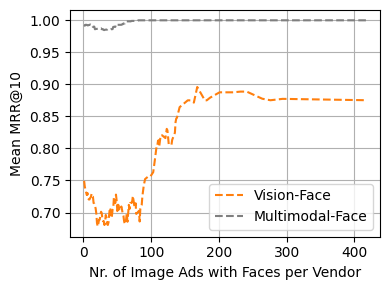

In [54]:
# Define the models and modalities you want to plot
model_names = ['vit-face', 'declutr-vit-face']
modalities = ['image', 'multimodal']
region = 'south'
metric = 'mrr'  # Can be 'mrr', 'rprecision', or 'macro'

# Call the function to plot the data
plot_performance_vs_face_frequency(data, south_face_freq, model_names, modalities, region, metric)

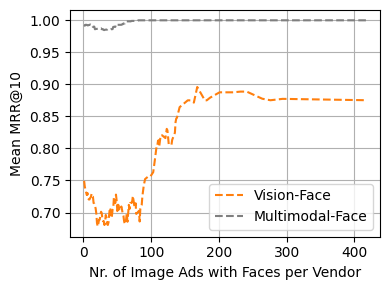

In [55]:
# Define the models and modalities you want to plot
model_names = ['vit-face', 'declutr-vit-face']
modalities = ['image', 'multimodal']
region = 'south'
metric = 'mrr'  # Can be 'mrr', 'rprecision', or 'macro'

# Call the function to plot the data
plot_performance_vs_face_frequency(data, south_face_freq, model_names, modalities, region, metric)

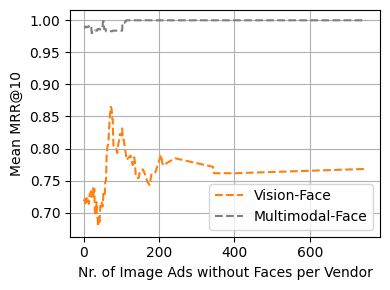

In [56]:
# Define the models and modalities you want to plot
model_names = ['vit-face', 'declutr-vit-face']
modalities = ['image', 'multimodal']
region = 'south'
metric = 'mrr'  # Can be 'mrr', 'rprecision', or 'macro'

# Call the function to plot the data
plot_performance_vs_noface_frequency(data, south_noface_freq, model_names, modalities, region, metric)

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from collections import defaultdict

plt.rcParams['axes.facecolor'] = '#f9f9f9'  # Light gray color for axes
plt.rcParams['figure.facecolor'] = 'white'  # White color for figure
plt.rcParams['grid.color'] = '#e5e5e5'      # Light gridlines

def plot_metric_by_vendor(ax, data, model_names, modalities, region, metric, ylabel_mapping):
    """
    Plots the specified metric for given models and modalities in the specified region.
    Plots into the provided Axes object.

    Parameters:
        ax (matplotlib.axes.Axes): The Axes object to plot on.
        data (dict): The data dictionary containing all metrics.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city.
        metric (str): The performance metric to plot.
        ylabel_mapping (dict): Mapping for y-axis labels.

    Returns:
        list: List of Line2D objects (handles) from the plot.
    """
    def convert_all_dicts_to_nrs(my_dict):
        return {int(k): float(v) for k, v in my_dict.items()}

    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7393B3'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']

    handles = []

    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue

        # Convert the dictionary keys and values to integers and floats
        metric_data = convert_all_dicts_to_nrs(metric_data)

        # Sort the data
        x, y = zip(*sorted(metric_data.items()))

        # Smooth the data
        window_size = max(1, len(y) // 20)
        y_smoothed = uniform_filter1d(y, size=window_size)

        
        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))

        # Plot the data
        line, = ax.plot(x, y_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
        handles.append(line)

    # Set labels
    ax.set_xlabel("Vendor ID")
    ax.set_ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    ax.grid(True)

    return handles

def plot_performance_vs_frequency(ax, data, freq_dict, model_names, modalities, region, metric, xlabel, ylabel_mapping, xlim=None):
    """
    Plots model performance vs frequency (class frequency, name frequency, etc.) for specified models.
    Plots into the provided Axes object.

    Parameters:
        ax (matplotlib.axes.Axes): The Axes object to plot on.
        data (dict): The data dictionary containing all metrics.
        freq_dict (dict): Dictionary mapping vendor IDs to frequencies.
        model_names (list): List of model names to include in the plot.
        modalities (list): List of modalities corresponding to each model.
        region (str): The region/city.
        metric (str): The performance metric to plot.
        xlabel (str): Label for the x-axis.
        ylabel_mapping (dict): Mapping for y-axis labels.

    Returns:
        list: List of Line2D objects (handles) from the plot.
    """
    # Prepare color and label mappings
    color_mapping = {
    ('declutr', 'text'): ('Text', '#D22B2B'),             # Red
    ('vit', 'image'): ('Vision', '#2CA02C'),              # Green
    ('vit-face', 'image'): ('Vision-Face', '#FF7F0E'),    # Orange
    ('vit-noface', 'image'): ('Vision-NoFace', '#1F77B4'),# Blue
    ('declutr-vit', 'multimodal-text'): ('M-Text', '#9467BD'),           # Purple
    ('declutr-vit', 'multimodal-vision'): ('M-Vision', '#8C564B'),       # Brown
    ('declutr-vit', 'multimodal'): ('Multimodal', '#E377C2'),            # Pink
    ('declutr-vit-face', 'multimodal'): ('Multimodal-Face', '#7393B3'),  # Gray
    ('declutr-vit-noface', 'multimodal'): ('Multimodal-NoFace', '#17BECF'),  # Cyan
}
    linestyles = ['--', '--', '--', '--', '--']

    handles = []

    for idx, (model_name, modality) in enumerate(zip(model_names, modalities)):
        # Get the metric data
        try:
            metric_data = data[model_name][region][modality][metric]
            if metric_data is None:
                print(f"No data available for {model_name} - {modality} in {region} for {metric}")
                continue
        except KeyError:
            print(f"Data not found for model: {model_name}, modality: {modality}, region: {region}, metric: {metric}")
            continue

        # Initialize a dictionary to map frequency to performance metrics
        freq_to_performance = defaultdict(list)

        # For each vendor ID in metric_data, get the frequency and performance
        for vendor_id_str, performance in metric_data.items():
            try:
                vendor_id = int(vendor_id_str)
                freq = freq_dict.get(vendor_id)
                if freq is None:
                    continue
                freq_to_performance[freq].append(float(performance))
            except ValueError:
                continue

        # Compute mean performance for each frequency
        freqs = []
        mean_performances = []
        for freq, performances in freq_to_performance.items():
            freqs.append(freq)
            mean_performance = sum(performances) / len(performances)
            mean_performances.append(mean_performance)

        if not freqs:
            print(f"No matching data found for model {model_name} in region {region}.")
            continue

        # Sort the data by frequency
        freqs, mean_performances = zip(*sorted(zip(freqs, mean_performances)))
        freqs = list(freqs)
        mean_performances = list(mean_performances)

        # Smooth the data
        window_size = max(1, len(mean_performances) // 20)
        window_size = min(window_size, 30)  # Limit window size to 30
        mean_performances_smoothed = uniform_filter1d(mean_performances, size=window_size)


        # Get label and color
        label, color = color_mapping.get((model_name, modality), (f"{model_name} - {modality}", None))

        # Plot the data
        line, = ax.plot(freqs, mean_performances_smoothed, label=label, linestyle=linestyles[idx % len(linestyles)], color=color)
        handles.append(line)

    # Set labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel_mapping.get(metric, metric.capitalize()))
    ax.grid(True)
    
    # Set x-axis limit if specified
    if xlim is not None:
        ax.set_xlim(0, xlim)

    return handles

def create_retrieval_plots(data, freq_dict, name_dict, face_freq_dict, noface_freq_dict, region, figure_name):
    """
    Creates a 5x2 grid of subplots with the specified plots, excluding the Macro-F1 (third column).
    Adjusted to have only two columns: 'mrr' and 'rprecision'.

    Parameters:
        data (dict): The data dictionary containing all metrics.
        freq_dict (dict): Frequency dictionary for plot_performance_vs_class_frequency.
        name_dict (dict): Name frequency dictionary for plot_performance_vs_name_frequency.
        face_freq_dict (dict): Face frequency dictionary for plot_performance_vs_face_frequency.
        noface_freq_dict (dict): No-face frequency dictionary for plot_performance_vs_noface_frequency.
        region (str): The region/city.

    Returns:
        None
    """
    # Set up the figure and axes
    fig, axes = plt.subplots(5, 2, figsize=(10, 13))  # Adjust figsize as needed

    # Define common parameters
    ylabel_mapping = {'mrr': 'Mean MRR@10', 'rprecision': 'Mean R-Precision'}
    # Only include 'mrr' and 'rprecision' in metrics
    metrics = ['mrr', 'rprecision']
    model_names = ['declutr', 'vit', 'declutr-vit', 'declutr-vit', 'declutr-vit']
    modalities = ['text', 'image', 'multimodal-text', 'multimodal-vision', 'multimodal']

    handles = []
    # Row 1 plots: plot_metric_by_vendor
    for i, metric in enumerate(metrics):
        ax = axes[0, i]
        h = plot_metric_by_vendor(ax, data, model_names, modalities, region, metric, ylabel_mapping)
        handles.extend(h)

    # Row 2 plots: plot_performance_vs_class_frequency
    for i, metric in enumerate(metrics):
        ax = axes[1, i]
        h = plot_performance_vs_frequency(
            ax, data, freq_dict, model_names, modalities, region, metric,
            xlabel='Ad Frequency per Vendor', ylabel_mapping=ylabel_mapping)
        handles.extend(h)

    # Row 3 plots: plot_performance_vs_name_frequency
    for i, metric in enumerate(metrics):
        ax = axes[2, i]
        h = plot_performance_vs_frequency(
            ax, data, name_dict, model_names, modalities, region, metric,
            xlabel='Number of Names in Ads per Vendor', ylabel_mapping=ylabel_mapping)
        handles.extend(h)

    # Row 4 plots: plot_performance_vs_face_frequency (face images)
    model_names_face = ['vit-face', 'declutr-vit-face']
    modalities_face = ['image', 'multimodal']
    for i, metric in enumerate(metrics):
        ax = axes[3, i]
        h = plot_performance_vs_frequency(
            ax, data, face_freq_dict, model_names_face, modalities_face, region, metric,
            xlabel='Number of Image Ads with Faces per Vendor', ylabel_mapping=ylabel_mapping, xlim=78)
        handles.extend(h)

    # Row 5 plots: plot_performance_vs_face_frequency (no-face images)
    for i, metric in enumerate(metrics):
        ax = axes[4, i]
        h = plot_performance_vs_frequency(
            ax, data, noface_freq_dict, model_names_face, modalities_face, region, metric,
            xlabel='Number of Image Ads without Faces per Vendor', ylabel_mapping=ylabel_mapping, xlim=78)
        handles.extend(h)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at the bottom for the legend


    # Create a single legend at the bottom
    # Get unique handles and labels
    unique_handles = []
    unique_labels = []
    for h in handles:
        label = h.get_label()
        if label not in unique_labels:
            unique_handles.append(h)
            unique_labels.append(label)

    fig.legend(unique_handles, unique_labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.01), fontsize=11)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # Show the plot
    plt.savefig(figure_name)
    plt.show()

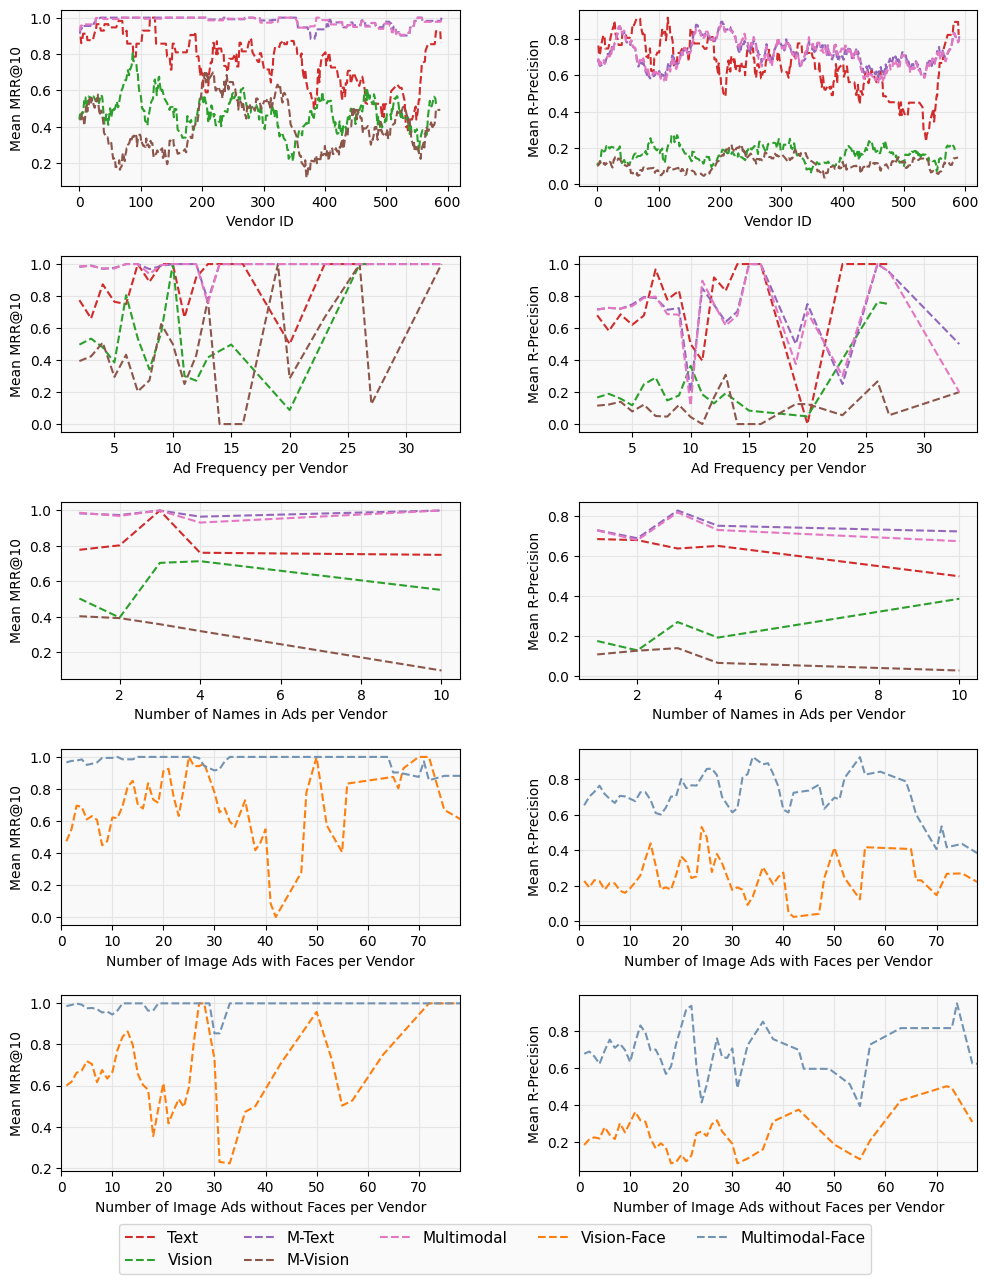

In [ ]:
# Prepare frequency dictionaries for the specified region (e.g., 'northeast')
freq_dict = northeast_freq_dict
name_dict = northeast_name_dict
face_freq_dict = northeast_face_freq
noface_freq_dict = northeast_noface_freq
region = 'northeast'

# Call the function to create the plots
create_retrieval_plots(data, freq_dict, name_dict, face_freq_dict, noface_freq_dict, region, figure_name="northeast_retrieval_results.jpg")

# Number of ads per vendor plot

In [35]:
south_df = pd.read_csv("../data/processed/south.csv")[['TEXT', 'IMAGES', 'VENDOR', 'FACES', 'CITY']].drop_duplicates()
midwest_df = pd.read_csv("../data/processed/midwest.csv")[['TEXT', 'IMAGES', 'VENDOR', 'FACES', 'CITY']].drop_duplicates()
west_df = pd.read_csv("../data/processed/west.csv")[['TEXT', 'IMAGES', 'VENDOR', 'FACES', 'CITY']].drop_duplicates()
northeast_df = pd.read_csv("../data/processed/northeast.csv")[['TEXT', 'IMAGES', 'VENDOR', 'FACES', 'CITY']].drop_duplicates()

south_df['region'] = "south"
midwest_df['region'] = "midwest"
west_df['region'] = "west"
northeast_df['region'] = "northeast"

In [36]:
# Function to map images with text for CLIP model
def map_images_with_text_for_clip_model(df, img_dir="/workspace/persistent/HTClipper/data/IMAGES", filter_by="vendor"):
    # Initialize a list to store the new rows
    new_rows = []

    # Iterate over each row in the dataframe
    for _, row in df.iterrows():
        text = row['TEXT']
        all_images = str(row['IMAGES']).split('|')
        characteristics = str(row['FACES']).split('|')
        if filter_by == "vendor":
            vendor = row['VENDOR']
        elif filter_by == "id":
            vendor = row['ID']
        region = row['region']
        
        # Create a new entry for each image
        for index, image in enumerate(all_images):
            full_image_path = os.path.join(img_dir, region, "image", "image", image)
            
            # Only add the row if the image exists at the specified path
            if os.path.exists(full_image_path):
                new_rows.append({
                    'TEXT': text,
                    'IMAGES': full_image_path,  # Store the full image path
                    'VENDOR': vendor,
                    'region' : region,
                    'FACES' : characteristics[index]
                })

    # Create a new dataframe from the list of new rows
    return pd.DataFrame(new_rows)

In [37]:
def process_my_text_data(df):
    df = df[['TEXT', 'VENDOR']].drop_duplicates()
    
    # Removing vendors that have less than 2 ads
    vendors_of_interest = {k:v for k, v in dict(Counter(df.VENDOR)).items() if v>1}
    df = df[df['VENDOR'].isin(list(vendors_of_interest.keys()))]

    # Remapping new vendor ids
    all_vendors = df.VENDOR.unique()
    vendor_to_idx_dict = {vendor: idx for idx, vendor in enumerate(all_vendors)}
    df["VENDOR"] = df["VENDOR"].replace(vendor_to_idx_dict)
    
    split_ratio = max(0.20, df.VENDOR.nunique()/len(df))
    train_df, test_df = train_test_split(df, test_size=split_ratio, random_state=1111, stratify=df['VENDOR'])
    return train_df

In [47]:
def process_my_vision_data(df):
    df = df[['IMAGE_HASH', 'VENDOR']].drop_duplicates()
    
    # Removing vendors that have less than 2 ads
    vendors_of_interest = {k:v for k, v in dict(Counter(df.VENDOR)).items() if v>1}
    df = df[df['VENDOR'].isin(list(vendors_of_interest.keys()))]

    # Remapping new vendor ids
    all_vendors = df.VENDOR.unique()
    vendor_to_idx_dict = {vendor: idx for idx, vendor in enumerate(all_vendors)}
    df["VENDOR"] = df["VENDOR"].replace(vendor_to_idx_dict)
    
    split_ratio = max(0.20, df.VENDOR.nunique()/len(df))
    train_df, test_df = train_test_split(df, test_size=split_ratio, random_state=1111, stratify=df['VENDOR'])
    return train_df

In [57]:
def process_my_multimodal_data(df):
    df = df[['TEXT', 'IMAGES', 'VENDOR']].drop_duplicates()
    
    # Removing vendors that have less than 2 ads
    vendors_of_interest = {k:v for k, v in dict(Counter(df.VENDOR)).items() if v>1}
    df = df[df['VENDOR'].isin(list(vendors_of_interest.keys()))]

    # Remapping new vendor ids
    all_vendors = df.VENDOR.unique()
    vendor_to_idx_dict = {vendor: idx for idx, vendor in enumerate(all_vendors)}
    df["VENDOR"] = df["VENDOR"].replace(vendor_to_idx_dict)
    
    split_ratio = max(0.20, df.VENDOR.nunique()/len(df))
    train_df, test_df = train_test_split(df, test_size=split_ratio, random_state=1111, stratify=df['VENDOR'])
    return train_df

In [50]:
vision_df = pd.read_csv("../data/processed/all_image_hash.csv")

In [53]:
south_vision_df = process_my_vision_data(vision_df[vision_df.region=="south"])
midwest_vision_df = process_my_vision_data(vision_df[vision_df.region=="midwest"])
west_vision_df = process_my_vision_data(vision_df[vision_df.region=="west"])
northeast_vision_df = process_my_vision_data(vision_df[vision_df.region=="northeast"])

In [38]:
south_text_df = process_my_text_data(south_df)
midwest_text_df = process_my_text_data(midwest_df)
west_text_df = process_my_text_data(west_df)
northeast_text_df = process_my_text_data(northeast_df)

In [58]:
south_multimodal_df = map_images_with_text_for_clip_model(south_df)
midwest_multimodal_df = map_images_with_text_for_clip_model(midwest_df)
west_multimodal_df = map_images_with_text_for_clip_model(west_df)
northeast_multimodal_df = map_images_with_text_for_clip_model(northeast_df)

south_multimodal_df = process_my_multimodal_data(south_multimodal_df)
midwest_multimodal_df = process_my_multimodal_data(midwest_multimodal_df)
west_multimodal_df = process_my_multimodal_data(west_multimodal_df)
northeast_multimodal_df = process_my_multimodal_data(northeast_multimodal_df)

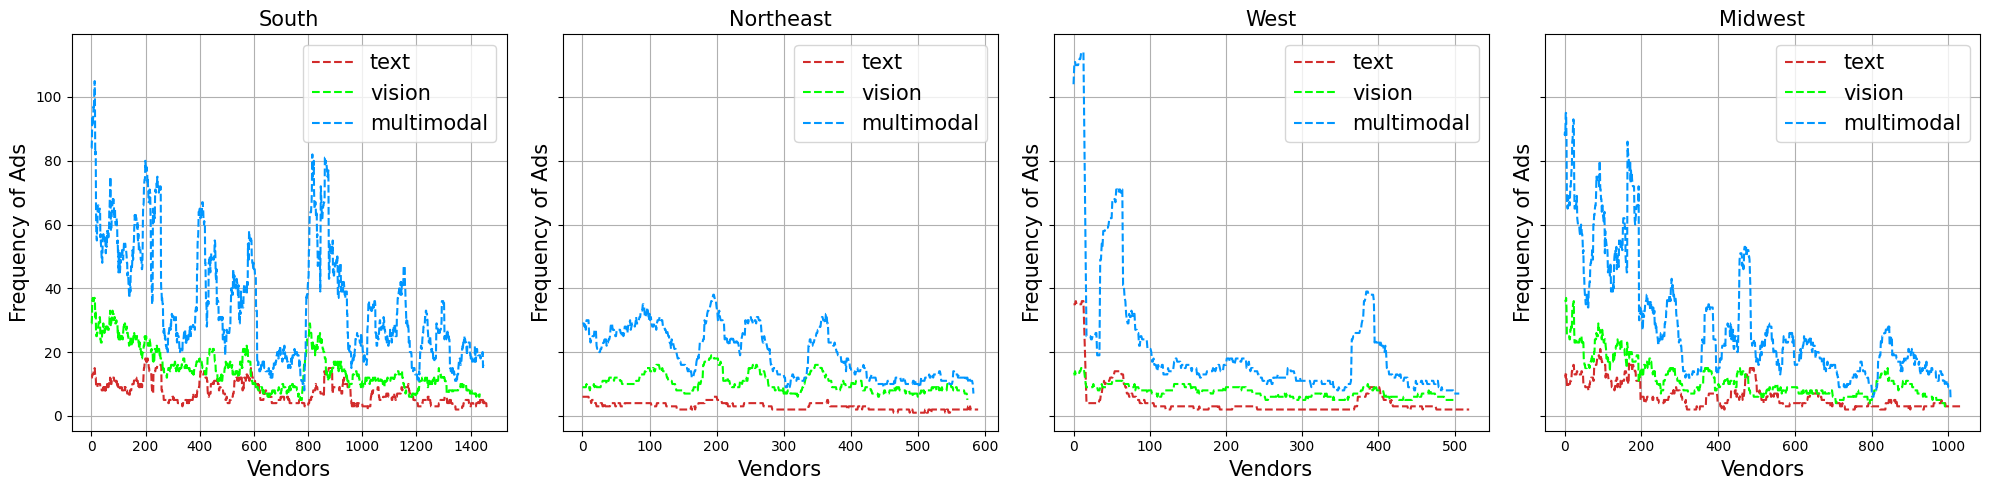

<Figure size 640x480 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt
from collections import Counter
from scipy.ndimage import uniform_filter1d

def plot_smoothed_dicts_subplot(ax, df1, df2, df3, labels, window_size=1, region_name=""):
    """
    Plots line plots for three dictionaries with smoothed values on a given subplot.

    Parameters:
    - ax (matplotlib.axes.Axes): Subplot axis to plot on.
    - df1, df2, df3 (DataFrame): DataFrames with a column 'VENDOR'.
    - labels (list): List of labels for the dictionaries in the legend.
    - window_size (int): The smoothing window size for the y-axis values.
    - region_name (str): Name of the region to use as a subplot title.

    Returns:
    - None
    """
    dict1 = dict(Counter(df1.VENDOR))
    dict2 = dict(Counter(df2.VENDOR))
    dict3 = dict(Counter(df3.VENDOR))

    # Convert dictionaries to sorted lists of keys and values
    keys1, values1 = zip(*sorted(dict1.items()))
    keys2, values2 = zip(*sorted(dict2.items()))
    keys3, values3 = zip(*sorted(dict3.items()))

    # Apply smoothing to the values
    smoothed_values1 = uniform_filter1d(values1, size=window_size)
    smoothed_values2 = uniform_filter1d(values2, size=window_size)
    smoothed_values3 = uniform_filter1d(values3, size=window_size)

    # Plotting
    ax.plot(keys1, smoothed_values1, label=labels[0], linestyle='--', color='#D22B2B')
    ax.plot(keys2, smoothed_values2, label=labels[1], linestyle='--', color='#00FF00')
    ax.plot(keys3, smoothed_values3, label=labels[2], linestyle='--', color='#0096FF')

    # Subplot settings
    ax.set_xlabel("Vendors", fontsize=15)
    ax.set_ylabel("Frequency of Ads", fontsize=15)
    ax.set_title(region_name, fontsize=15)
    ax.grid(True)
    ax.legend(fontsize=15)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot for each region
plot_smoothed_dicts_subplot(axes[0], south_text_df, south_vision_df, south_multimodal_df, 
                             labels=["text", "vision", "multimodal"], window_size=30, region_name="South")
plot_smoothed_dicts_subplot(axes[1], northeast_text_df, northeast_vision_df, northeast_multimodal_df, 
                             labels=["text", "vision", "multimodal"], window_size=30, region_name="Northeast")
plot_smoothed_dicts_subplot(axes[2], west_text_df, west_vision_df, west_multimodal_df, 
                             labels=["text", "vision", "multimodal"], window_size=30, region_name="West")
plot_smoothed_dicts_subplot(axes[3], midwest_text_df, midwest_vision_df, midwest_multimodal_df, 
                             labels=["text", "vision", "multimodal"], window_size=30, region_name="Midwest")

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig("freq_distribution_plot.png")

# performance of common and unique vendors

In [7]:
data = model_metrics["CE-SupCon-mean"]

In [20]:
# Initialize 4D dictionary
performance_dict = {}

for modality in ["text", "image", "multimodal"]:
    performance_dict[modality] = {}
    for metric in ['mrr', 'rprecision', 'macro']:
        performance_dict[modality][metric] = {}
        for region in ["midwest", "west", "northeast"]:
            south_data = data[f"CE-SupCon-mean_south_{modality}"][metric]
            other_data = data[f"CE-SupCon-mean_{region}_{modality}"][metric]
            
            south_vendors = set(south_data.keys())
            other_vendors = set(other_data.keys())
            common_vendors = south_vendors.intersection(other_vendors)
            
            common_dict = {k:v for k,v in other_data.items() if k in common_vendors}
            unique_dict = {k:v for k,v in other_data.items() if k not in common_vendors}
            
            common_performance = list(common_dict.values())
            unique_performance = list(unique_dict.values())
            
            # Compute mean ± std
            common_mean_std = f"{np.mean(common_performance):.4f} ± {np.std(common_performance):.2f}" if common_performance else "N/A"
            unique_mean_std = f"{np.mean(unique_performance):.4f} ± {np.std(unique_performance):.2f}" if unique_performance else "N/A"
            
            performance_dict[modality][metric][region] = {
                "common": common_mean_std,
                "unique": unique_mean_std,
            }

In [21]:
# Convert to Pandas DataFrame for visualization
df = pd.DataFrame.from_dict(
    {(modality, metric, region): performance_dict[modality][metric][region]
     for modality in performance_dict
     for metric in performance_dict[modality]
     for region in performance_dict[modality][metric]},
    orient="index"
)

# Add MultiIndex to the DataFrame
df.index = pd.MultiIndex.from_tuples(df.index, names=["Modality", "Metric", "Region"])
df.reset_index(inplace=True)

In [22]:
df

,Modality,Metric,Region,common,unique
0,text,mrr,midwest,0.7164 ± 0.41,0.7910 ± 0.37
1,text,mrr,west,0.8511 ± 0.33,0.8498 ± 0.33
2,text,mrr,northeast,0.7859 ± 0.38,0.7013 ± 0.42
3,text,rprecision,midwest,0.5027 ± 0.38,0.6251 ± 0.37
4,text,rprecision,west,0.7128 ± 0.36,0.7234 ± 0.36
5,text,rprecision,northeast,0.6553 ± 0.40,0.5817 ± 0.44
6,text,macro,midwest,0.5027 ± 0.38,0.6251 ± 0.37
7,text,macro,west,0.7128 ± 0.36,0.7234 ± 0.36
8,text,macro,northeast,0.6553 ± 0.40,0.5817 ± 0.44
9,image,mrr,midwest,0.3462 ± 0.36,0.3583 ± 0.38
